### Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from scipy import stats

### Data Visualization

In [3]:
with open("../data/processed/01_data_processed.pkl", "rb") as file:
    df = pickle.load(file)
    
df.head(5)

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,1,400000,6,1,0,0,0
1,31,Private Sector,1,1250000,7,0,0,0,0
2,34,Private Sector,1,500000,4,1,0,0,1
3,28,Private Sector,1,700000,3,1,0,0,0
4,28,Private Sector,1,700000,8,1,1,0,0


In [4]:
df.describe()

,Age,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
count,1987.000000,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000
mean,29.650226,0.851535,9.327630e+05,4.752894,0.277806,0.209864,0.191243,0.357323
std,2.913308,0.355650,3.768557e+05,1.609650,0.448030,0.407314,0.393379,0.479332
min,25.000000,0.000000,3.000000e+05,2.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.000000,6.000000e+05,4.000000,0.000000,0.000000,0.000000,0.000000
50%,29.000000,1.000000,9.000000e+05,5.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,1.000000,1.250000e+06,6.000000,1.000000,0.000000,0.000000,1.000000
max,35.000000,1.000000,1.800000e+06,9.000000,1.000000,1.000000,1.000000,1.000000


##### Age

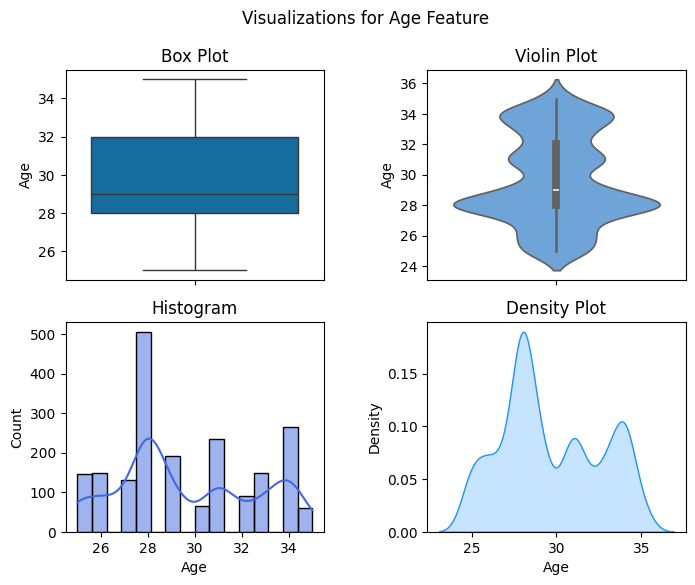

In [5]:
def visualize_numeric_column(df, column_name):
    # Create subplots as a 2x2 grid
    fig, axes = plt.subplots(2, 2, figsize=(8, 6))
    
    plt.subplots_adjust(wspace=0.4)
    
    # Define different shades of blue
    shades_of_blue = ["#0072B5", "#5DA5E9", "#4169E1", "#1E90FF"]
    
    # Box Plot with blue color
    sns.boxplot(data=df, y=column_name, ax=axes[0, 0], color=shades_of_blue[0])
    axes[0, 0].set_title('Box Plot')
    
    # Violin Plot with a different shade of blue
    sns.violinplot(data=df, y=column_name, ax=axes[0, 1], color=shades_of_blue[1])
    axes[0, 1].set_title('Violin Plot')
    
    # Histogram with another shade of blue
    sns.histplot(data=df, x=column_name, ax=axes[1, 0], kde=True, color=shades_of_blue[2])
    axes[1, 0].set_title('Histogram')
    
    # Density Plot with a different shade of blue
    sns.kdeplot(data=df, x=column_name, ax=axes[1, 1], fill=True, color=shades_of_blue[3])
    axes[1, 1].set_title('Density Plot')
    
    # Set an overall title for the subplots
    fig.suptitle(f'Visualizations for {column_name} Feature')
    
    # Display the plots
    plt.show()


visualize_numeric_column(df, 'Age')


In [6]:
def calculate_distribution_stats(df, column_name, outlier_threshold=1.5):
    # Extract the specified column as a Series
    data = df[column_name]
    
    # Calculate mean and median
    mean = data.mean()
    median = data.median()
    
    # Calculate skewness
    skewness = data.skew()
    
    # Calculate interquartile range (IQR)
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    
    # Calculate lower and upper bounds for outliers
    lower_bound = Q1 - outlier_threshold * IQR
    upper_bound = Q3 + outlier_threshold * IQR
    
    # Identify outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    
    # Count the number of outliers
    num_outliers = len(outliers)
    
    return {
        "Mean": mean,
        "Median": median,
        "Skewness": skewness,
        "Total Outliers": num_outliers,
        "IQR": IQR
    }

calculate_distribution_stats(df, 'Age')

{'Mean': 29.650226472068447,
 'Median': 29.0,
 'Skewness': 0.23962475139295264,
 'Total Outliers': 0,
 'IQR': 4.0}

The results of the  function for the 'Age' column are as follows:

- **Mean**: The mean age is approx 30 yrs old. 

- **Median**: The median age is 29. So half of the ages are below 29 years old and half are above.

- **Skewness**: The skewness value is approximately 0.239. This positive skewness indicates that the distribution of age is slightly positively skewed. In this context, it means that there are more younger people than older people in the dataset.

- **Total Outliers**: The count of outliers is 0, which suggests that there are no extreme values (outliers) in the dataset.

- **IQR (Interquartile Range)**: The IQR is approximately 4. In this case, it indicates that the age for the younger 50% of the dataset range from 25 to 29 and the older 50% range from 29-33 years old

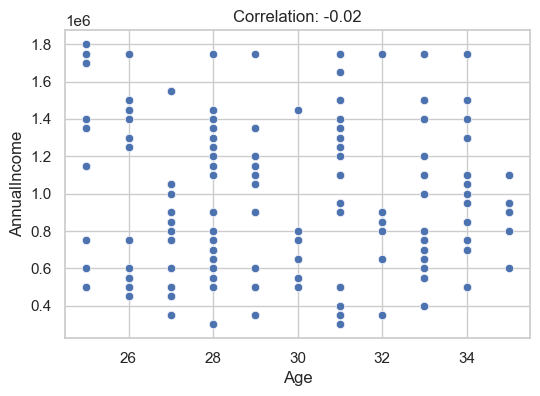

-0.020101486109190988

In [7]:
def calculate_age_income_correlation(df, column1, column2):
    
    correlation = df[column1].corr(df[column2])
    
    # Visualize the correlation
    sns.set(style="whitegrid")
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x=column1, y=column2)
    plt.title(f'Correlation: {correlation:.2f}')
    plt.show()
    
    return correlation

age_income_corr = calculate_age_income_correlation(df, 'Age', 'AnnualIncome')

age_income_corr

A correlation coefficient of -0.0201 suggests a very weak and almost negligible negative relationship between 'Age' and 'AnnualIncome.' 

It shows that changes in 'Age' are not strongly associated with changes in 'AnnualIncome' in this dataset and other factors likely play a more significant role in determining annual income.

##### Employment Type

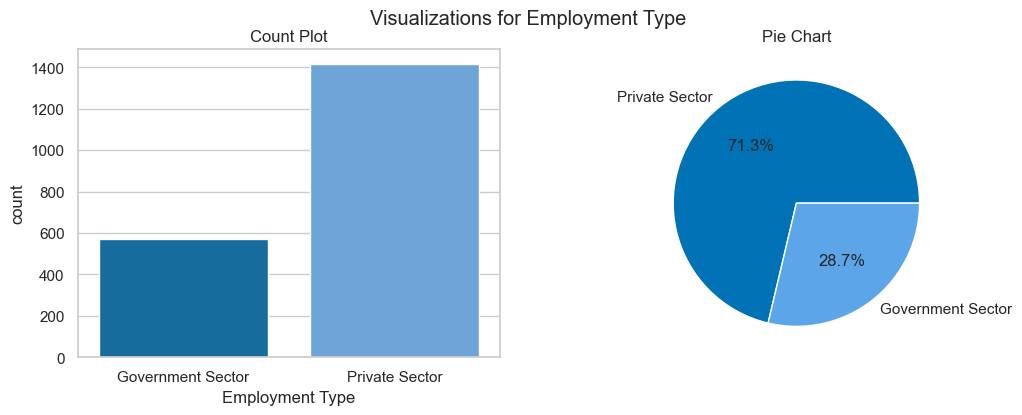

In [8]:
def visualize_categorical_column(df, column_name):
    # Create subplots for categorical features
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    # Define different shades of blue
    shades_of_blue = ["#0072B5", "#5DA5E9"]
    
    # Count Plot for categories
    sns.countplot(data=df, x=column_name, hue=column_name, palette=shades_of_blue, ax=axes[0], legend=False)
    axes[0].set_title('Count Plot')
    
    # Pie Chart for categories
    data_counts = df[column_name].value_counts()
    axes[1].pie(data_counts, labels=data_counts.index, autopct='%1.1f%%', colors=shades_of_blue)
    axes[1].set_title('Pie Chart')
    
    # Set an overall title for the subplots
    fig.suptitle(f'Visualizations for {column_name}')
    
    # Display the plots
    plt.show()


visualize_categorical_column(df, 'Employment Type')

More people are employed in the private sector

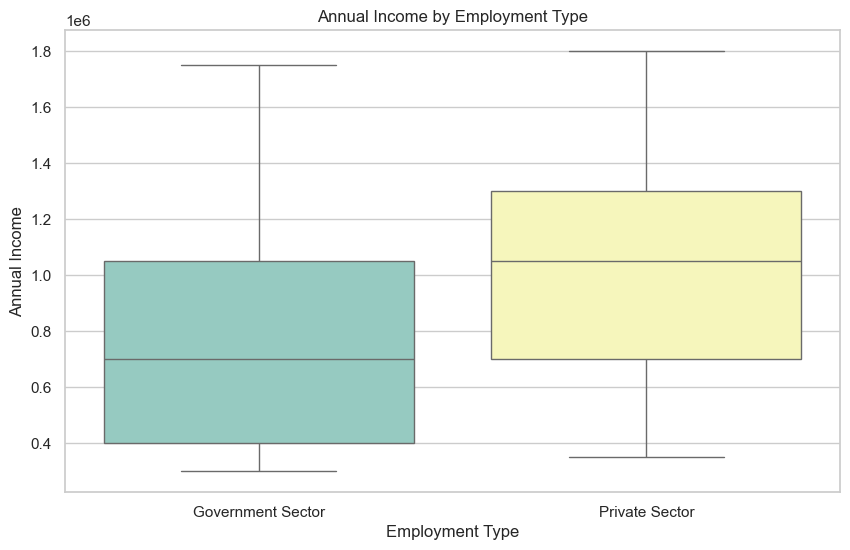

Income Statistics by Employment Type:
                    count          mean            std       min       25%  \
Employment Type                                                              
Government Sector   570.0  7.253509e+05  356168.785210  300000.0  400000.0   
Private Sector     1417.0  1.016196e+06  352037.850129  350000.0  700000.0   

                         50%        75%        max  
Employment Type                                     
Government Sector   700000.0  1050000.0  1750000.0  
Private Sector     1050000.0  1300000.0  1800000.0  


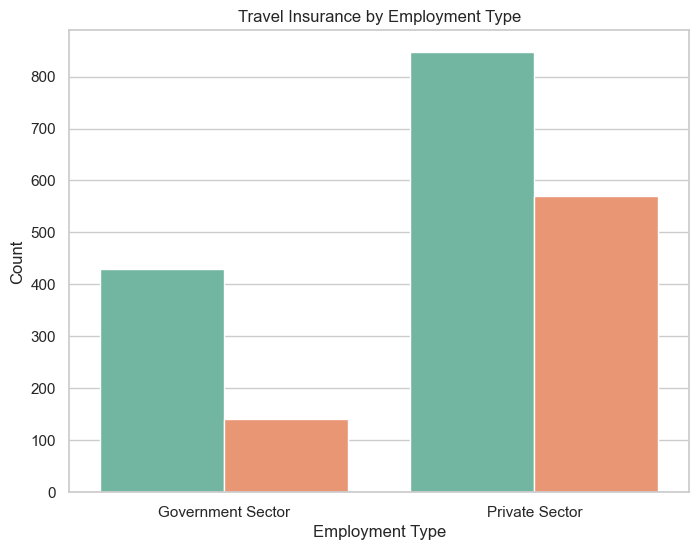

Travel Insurance Statistics by Employment Type:
TravelInsurance      0    1
Employment Type            
Government Sector  430  140
Private Sector     847  570


In [9]:
# Income by employment type: Analyze how employment type affects annual income and its relationship with travel insurance

def analyze_employment_and_insurance(df, employment_column, income_column, insurance_column):
    # 1. Visualize Annual Income by Employment Type
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x=employment_column, y=income_column, hue=employment_column, palette="Set3", legend=False)
    plt.title('Annual Income by Employment Type')
    plt.xlabel('Employment Type')
    plt.ylabel('Annual Income')
    plt.show()

    # 2. Analyze Income Statistics
    income_statistics = df.groupby(employment_column)[income_column].describe()
    print("Income Statistics by Employment Type:")
    print(income_statistics)

    # 3. Visualize the Relationship with Travel Insurance
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=employment_column, hue=insurance_column, palette="Set2", legend=False)
    plt.title('Travel Insurance by Employment Type')
    plt.xlabel('Employment Type')
    plt.ylabel('Count')
    plt.show()

    # 4. Analyze Travel Insurance Statistics
    insurance_stats = df.groupby([employment_column, insurance_column]).size().unstack(fill_value=0)
    print("Travel Insurance Statistics by Employment Type:")
    print(insurance_stats)

    
analyze_employment_and_insurance(df, 'Employment Type', 'AnnualIncome', 'TravelInsurance')

When analyzing how employment type affects annual income and its relationship with travel insurance the following was shown:

- **Income**: Those in the Private Sector have a higher annual income than those in the Government Sector.

- **Average Income**: The average income for employees in the Private Sector is approximately $1,016,196, which is higher than the average income in the Government Sector.

- **Travel Insurance**: Those in the Private Sector tend to purchase travel insurance at a higher rate than those in the Government Sector.


##### GraduateorNot

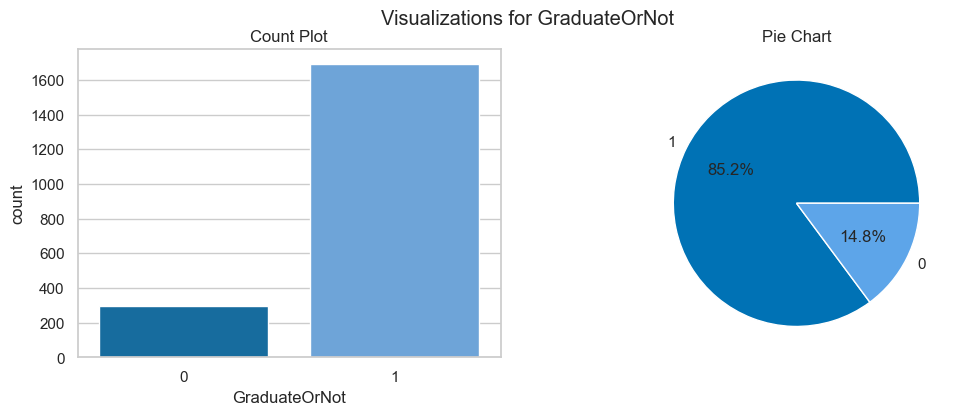

In [10]:
# Educational background: The distribution of individuals who are graduates and those who are not.

def visualize_binary_column(df, column_name):
    # Create subplots as a 1x2 grid for binary features
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    # Define different shades of blue
    shades_of_blue = ["#0072B5", "#5DA5E9"]
    
    # Count Plot for 'Yes' and 'No' categories
    sns.countplot(data=df, x=column_name, ax=axes[0], hue=column_name, palette=shades_of_blue, legend=False)
    axes[0].set_title('Count Plot')
    
    # Pie Chart for 'Yes' and 'No' categories
    data_counts = df[column_name].value_counts()
    axes[1].pie(data_counts, labels=data_counts.index, autopct='%1.1f%%', colors=shades_of_blue)
    axes[1].set_title('Pie Chart')
    
    # Set an overall title for the subplots
    fig.suptitle(f'Visualizations for {column_name}')
    
    # Display the plots
    plt.show()


visualize_binary_column(df, 'GraduateOrNot')

Most people had a college degree

In [11]:
# Correlation with income: Is being a graduate has an impact on annual income and, consequently, travel insurance purchases.

def calculate_and_visualize_correlation(df, column1, column2, title):
    correlation = df[column1].corr(df[column2])
    
    return correlation


grad_income_corr = calculate_and_visualize_correlation(df, 'GraduateOrNot', 'AnnualIncome', 'Correlation with income')

grad_income_corr

0.10806586483580924

While there is a positive correlation between being a graduate and having a higher annual income, this correlation is relatively weak, and many other factors likely contribute to variations in annual income in your dataset.

##### AnnualIncome

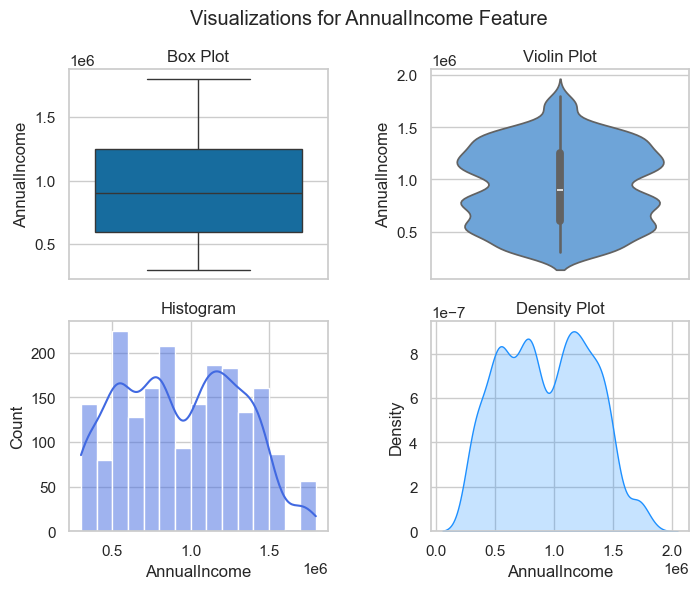

In [12]:
def visualize_numeric_column(df, column_name):
    # Create subplots as a 2x2 grid
    fig, axes = plt.subplots(2, 2, figsize=(8, 6))
    
    plt.subplots_adjust(wspace=0.4)
    
    # Define different shades of blue
    shades_of_blue = ["#0072B5", "#5DA5E9", "#4169E1", "#1E90FF"]
    
    # Box Plot with blue color
    sns.boxplot(data=df, y=column_name, ax=axes[0, 0], color=shades_of_blue[0])
    axes[0, 0].set_title('Box Plot')
    
    # Violin Plot with a different shade of blue
    sns.violinplot(data=df, y=column_name, ax=axes[0, 1], color=shades_of_blue[1])
    axes[0, 1].set_title('Violin Plot')
    
    # Histogram with another shade of blue
    sns.histplot(data=df, x=column_name, ax=axes[1, 0], kde=True, color=shades_of_blue[2])
    axes[1, 0].set_title('Histogram')
    
    # Density Plot with a different shade of blue
    sns.kdeplot(data=df, x=column_name, ax=axes[1, 1], fill=True, color=shades_of_blue[3])
    axes[1, 1].set_title('Density Plot')
    
    # Set an overall title for the subplots
    fig.suptitle(f'Visualizations for {column_name} Feature')
    
    # Display the plots
    plt.show()


visualize_numeric_column(df, 'AnnualIncome')


In [13]:
def calculate_distribution_stats(df, column_name, outlier_threshold=1.5):
    # Extract the specified column as a Series
    data = df[column_name]
    
    # Calculate mean and median
    mean = data.mean()
    median = data.median()
    
    # Calculate skewness
    skewness = data.skew()
    
    # Calculate interquartile range (IQR)
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    
    # Calculate lower and upper bounds for outliers
    lower_bound = Q1 - outlier_threshold * IQR
    upper_bound = Q3 + outlier_threshold * IQR
    
    # Identify outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    
    # Count the number of outliers
    num_outliers = len(outliers)
    
    return {
        "Mean": mean,
        "Median": median,
        "Skewness": skewness,
        "Total Outliers": num_outliers,
        "IQR": IQR
    }

calculate_distribution_stats(df, 'AnnualIncome')

{'Mean': 932762.9592350277,
 'Median': 900000.0,
 'Skewness': 0.07841699043593056,
 'Total Outliers': 0,
 'IQR': 650000.0}

The results of the function for the 'AnnualIncome' column are as follows:

- **Mean**: The mean income is approximately $932,763.

- **Median**: The median income is $900,000 and indicates that half of the incomes are below $900,000, and half are above.

- **Skewness**: The skewness value is approximately 0.0784. In this context, it means that there may be a few individuals with relatively high incomes that are pulling the distribution slightly to the right.

- **Total Outliers**: The count of outliers is 0, which suggests that there are no extreme values (outliers) in the dataset.

- **IQR (Interquartile Range)**: The IQR is approximately $650,000. In this case, it indicates that the income values for the middle 50% of the dataset range from $250,000 to $900,000 (Q1 to Q3), with a range of $650,000.



##### FamilyMembers

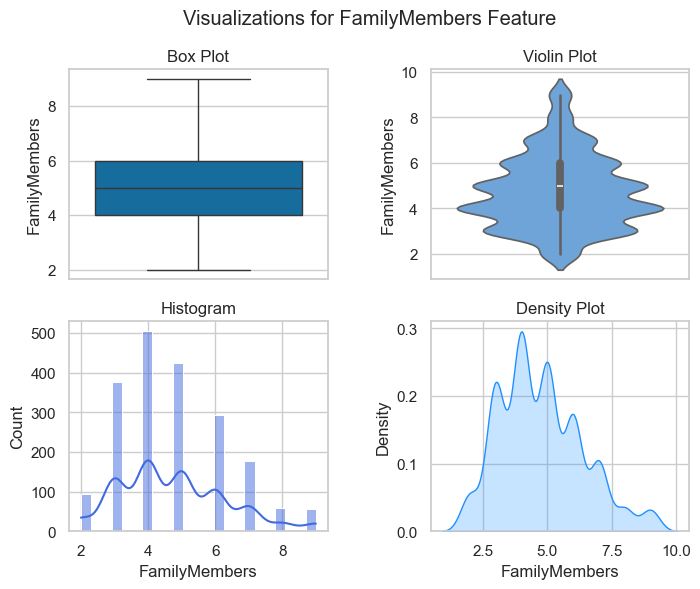

In [14]:
def visualize_numeric_column(df, column_name):
    # Create subplots as a 2x2 grid
    fig, axes = plt.subplots(2, 2, figsize=(8, 6))
    
    plt.subplots_adjust(wspace=0.4)
    
    # Define different shades of blue
    shades_of_blue = ["#0072B5", "#5DA5E9", "#4169E1", "#1E90FF"]
    
    # Box Plot with blue color
    sns.boxplot(data=df, y=column_name, ax=axes[0, 0], color=shades_of_blue[0])
    axes[0, 0].set_title('Box Plot')
    
    # Violin Plot with a different shade of blue
    sns.violinplot(data=df, y=column_name, ax=axes[0, 1], color=shades_of_blue[1])
    axes[0, 1].set_title('Violin Plot')
    
    # Histogram with another shade of blue
    sns.histplot(data=df, x=column_name, ax=axes[1, 0], kde=True, color=shades_of_blue[2])
    axes[1, 0].set_title('Histogram')
    
    # Density Plot with a different shade of blue
    sns.kdeplot(data=df, x=column_name, ax=axes[1, 1], fill=True, color=shades_of_blue[3])
    axes[1, 1].set_title('Density Plot')
    
    # Set an overall title for the subplots
    fig.suptitle(f'Visualizations for {column_name} Feature')
    
    # Display the plots
    plt.show()


visualize_numeric_column(df, 'FamilyMembers')


In [15]:
def calculate_distribution_stats(df, column_name, outlier_threshold=1.5):
    # Extract the specified column as a Series
    data = df[column_name]
    
    # Calculate mean and median
    mean = data.mean()
    median = data.median()
    
    # Calculate skewness
    skewness = data.skew()
    
    # Calculate interquartile range (IQR)
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    
    # Calculate lower and upper bounds for outliers
    lower_bound = Q1 - outlier_threshold * IQR
    upper_bound = Q3 + outlier_threshold * IQR
    
    # Identify outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    
    # Count the number of outliers
    num_outliers = len(outliers)
    
    return {
        "Mean": mean,
        "Median": median,
        "Skewness": skewness,
        "Total Outliers": num_outliers,
        "IQR":IQR
    }

calculate_distribution_stats(df, 'FamilyMembers')

{'Mean': 4.752893809763463,
 'Median': 5.0,
 'Skewness': 0.5611969123054563,
 'Total Outliers': 0,
 'IQR': 2.0}

The results of the function for the 'FamilyMembers' column are as follows:

- **Mean**: The mean number of family members is approximately 4.75 (5 rounded), indicating that most people in this dataset had a relatively medium sized family.

- **Median**: The median number of family members is 5.0. It indicates that half of the entries have 5 or fewer family members, and the other half have more than 5 family members.

- **Skewness**: The skewness value is approximately 0.5612. This positive skewness indicates that the distribution of the number of family members is positively skewed. In this context, it means that there may be a higher number of households with a relatively smaller number of family members, and a smaller number of households with a larger number of family members.

- **Total Outliers**: The count of outliers is 0, which suggests that there are no extreme values (outliers) in the dataset.

- **IQR (Interquartile Range)**: The IQR is 2.0. In this case, it indicates that the number of family members for the middle 50% of the dataset ranges from 3 to 5 (Q1 to Q3), with a range of 2.



##### ChronicDiseases

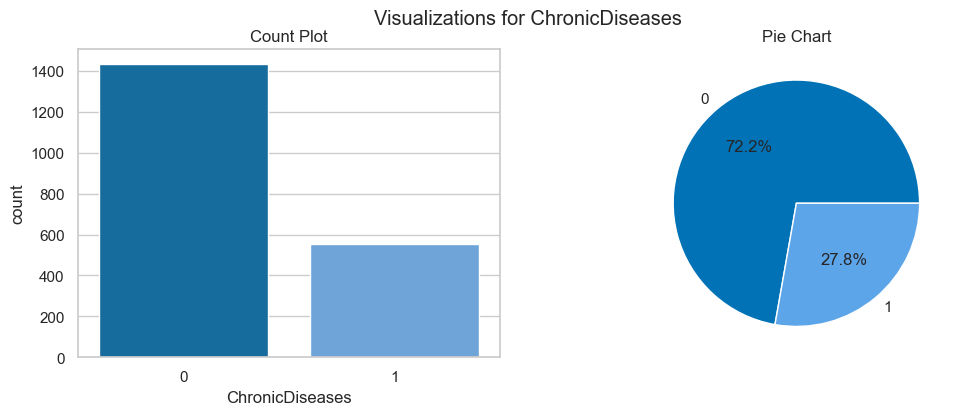

In [16]:
def visualize_binary_column(df, column_name):
    # Create subplots as a 1x2 grid for binary features
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    # Define different shades of blue
    shades_of_blue = ["#0072B5", "#5DA5E9"]
    
    # Count Plot for 'Yes' and 'No' categories
    sns.countplot(data=df, x=column_name, ax=axes[0], hue=column_name, palette=shades_of_blue, legend=False)
    axes[0].set_title('Count Plot')
    
    # Pie Chart for 'Yes' and 'No' categories
    data_counts = df[column_name].value_counts()
    axes[1].pie(data_counts, labels=data_counts.index, autopct='%1.1f%%', colors=shades_of_blue)
    axes[1].set_title('Pie Chart')
    
    # Set an overall title for the subplots
    fig.suptitle(f'Visualizations for {column_name}')
    
    # Display the plots
    plt.show()


visualize_binary_column(df, 'ChronicDiseases')


Majority of people in this dataset have a chronic disease

##### FrequentFlyer

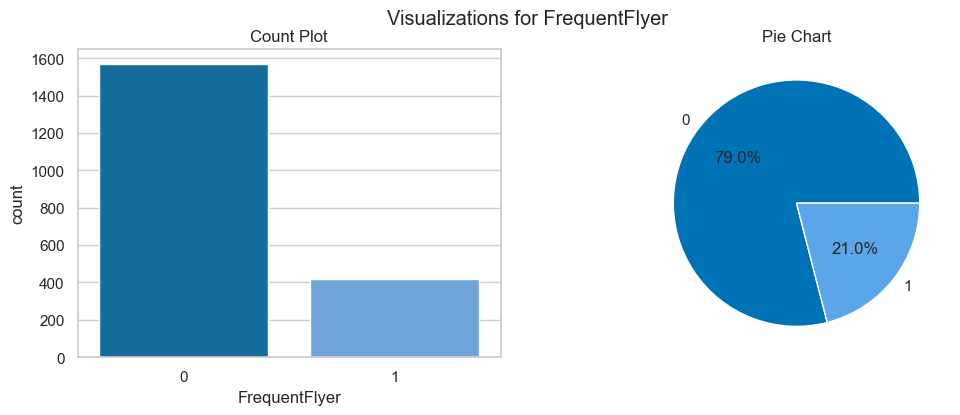

In [17]:
# Determine the percentage of individuals who are frequent flyers

def visualize_binary_column(df, column_name):
    # Create subplots as a 1x2 grid for binary features
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    # Define different shades of blue
    shades_of_blue = ["#0072B5", "#5DA5E9"]
    
    # Count Plot for 'Yes' and 'No' categories
    sns.countplot(data=df, x=column_name, ax=axes[0], hue=column_name, palette=shades_of_blue, legend=False)
    axes[0].set_title('Count Plot')
    
    # Pie Chart for 'Yes' and 'No' categories
    data_counts = df[column_name].value_counts()
    axes[1].pie(data_counts, labels=data_counts.index, autopct='%1.1f%%', colors=shades_of_blue)
    axes[1].set_title('Pie Chart')
    
    # Set an overall title for the subplots
    fig.suptitle(f'Visualizations for {column_name}')
    
    # Display the plots
    plt.show()


visualize_binary_column(df, 'FrequentFlyer')


Most people in this dataset are frequent flyers

##### EverTravelledAbroad

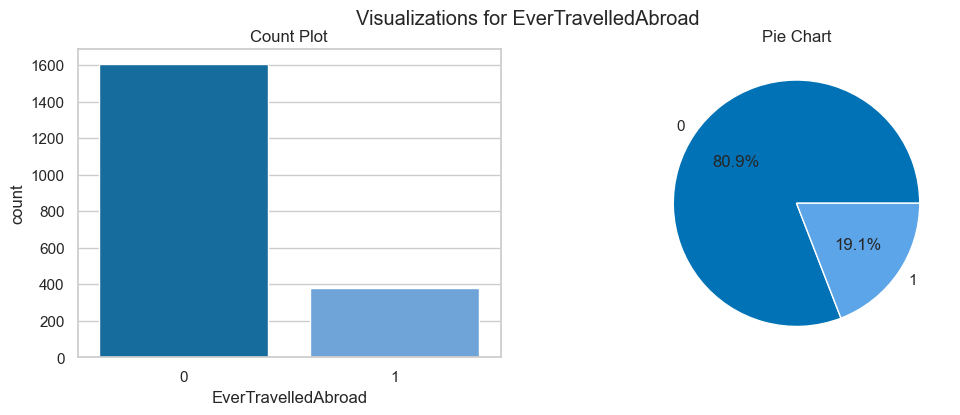

In [18]:
# Examine how many individuals have previously traveled abroad

def visualize_binary_column(df, column_name):
    # Create subplots as a 1x2 grid for binary features
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    # Define different shades of blue
    shades_of_blue = ["#0072B5", "#5DA5E9"]
    
    # Count Plot for 'Yes' and 'No' categories
    sns.countplot(data=df, x=column_name, ax=axes[0], hue=column_name, palette=shades_of_blue, legend=False)
    axes[0].set_title('Count Plot')
    
    # Pie Chart for 'Yes' and 'No' categories
    data_counts = df[column_name].value_counts()
    axes[1].pie(data_counts, labels=data_counts.index, autopct='%1.1f%%', colors=shades_of_blue)
    axes[1].set_title('Pie Chart')
    
    # Set an overall title for the subplots
    fig.suptitle(f'Visualizations for {column_name}')
    
    # Display the plots
    plt.show()


visualize_binary_column(df, 'EverTravelledAbroad')


Most people in this dataset have traveled abroad

##### TravelInsurance

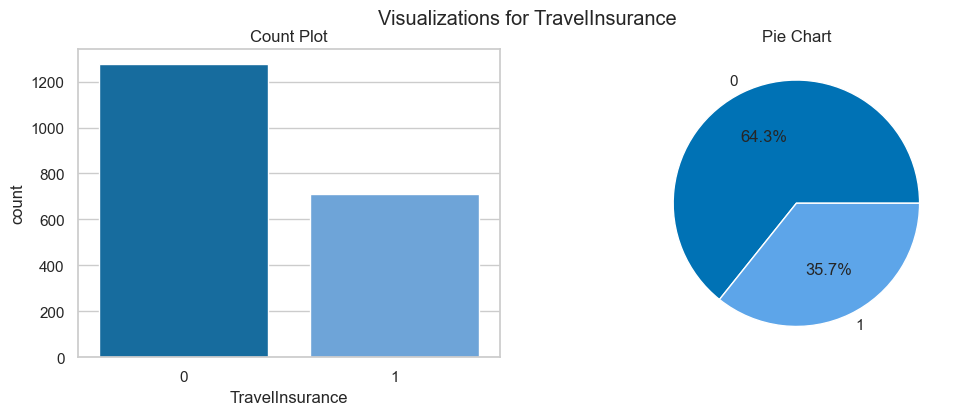

In [19]:
# Target variable: Assess the distribution of purchased (1) and non-purchased (0) travel insurance

# Examine how many individuals have previously traveled abroad

def visualize_binary_column(df, column_name):
    # Create subplots as a 1x2 grid for binary features
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    # Define different shades of blue
    shades_of_blue = ["#0072B5", "#5DA5E9"]
    
    # Count Plot for 'Yes' and 'No' categories
    sns.countplot(data=df, x=column_name, ax=axes[0], hue=column_name, palette=shades_of_blue, legend=False)
    axes[0].set_title('Count Plot')
    
    # Pie Chart for 'Yes' and 'No' categories
    data_counts = df[column_name].value_counts()
    axes[1].pie(data_counts, labels=data_counts.index, autopct='%1.1f%%', colors=shades_of_blue)
    axes[1].set_title('Pie Chart')
    
    # Set an overall title for the subplots
    fig.suptitle(f'Visualizations for {column_name}')
    
    # Display the plots
    plt.show()


visualize_binary_column(df, 'TravelInsurance')


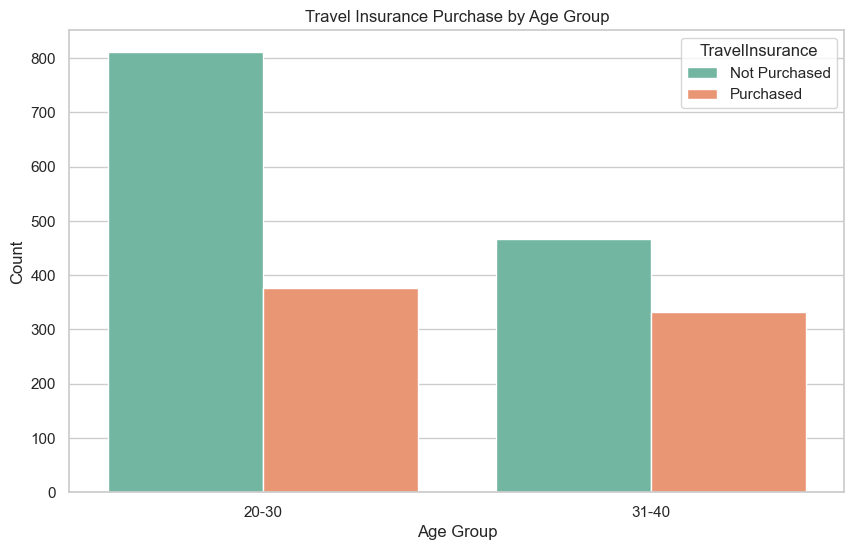

Travel Insurance Statistics by Age Group:
TravelInsurance    0    1
AgeGroup                 
20-30            811  377
31-40            466  333


In [21]:
# Age groups: Analyze how different age groups behave in terms of travel insurance purchases.

def analyze_age_groups_and_insurance(df, age_column, insurance_column):
    # Define age groups
    age_bins = [20, 30, 40]
    age_labels = ['20-30', '31-40']
    
    # Create a new column for age groups
    df['AgeGroup'] = pd.cut(df[age_column], bins=age_bins, labels=age_labels)
    
    # Visualize Travel Insurance Purchase by Age Group
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x='AgeGroup', hue=insurance_column, palette="Set2", legend=True)
    plt.title('Travel Insurance Purchase by Age Group')
    plt.xlabel('Age Group')
    plt.ylabel('Count')
    plt.legend(title=insurance_column, labels=['Not Purchased', 'Purchased'])
    plt.show()

    # Analyze Travel Insurance Statistics by Age Group
    insurance_stats = df.groupby(['AgeGroup', insurance_column]).size().unstack(fill_value=0)
    print("Travel Insurance Statistics by Age Group:")
    print(insurance_stats)

analyze_age_groups_and_insurance(df, 'Age', 'TravelInsurance')


More individuals in the '20-30' age group have purchased travel insurance compared to the '31-40' age group.

However, a higher number of those in the 20-30 age group do not have travel insurance

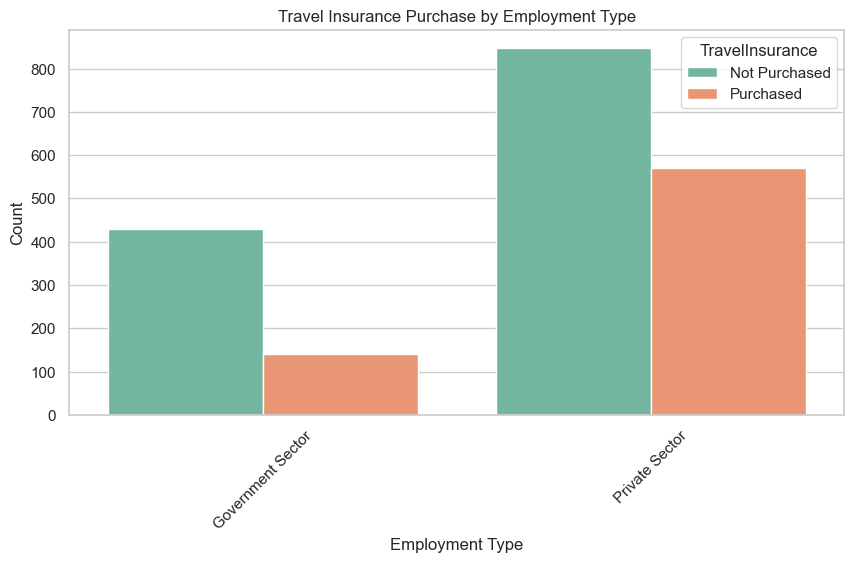

Travel Insurance Statistics by Employment Type:
TravelInsurance      0    1
Employment Type            
Government Sector  430  140
Private Sector     847  570


In [22]:
# Purchase behavior: Examine whether certain employment types are more likely to buy travel insurance

def analyze_employment_and_insurance(df, employment_column, insurance_column):
    # Visualize Travel Insurance Purchase by Employment Type
    plt.figure(figsize=(10,5))
    sns.countplot(data=df, x=employment_column, hue=insurance_column, palette="Set2")
    plt.title('Travel Insurance Purchase by Employment Type')
    plt.xlabel('Employment Type')
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.legend(title=insurance_column, labels=['Not Purchased', 'Purchased'])
    plt.show()

    # Analyze Travel Insurance Statistics by Employment Type
    insurance_stats = df.groupby([employment_column, insurance_column]).size().unstack(fill_value=0)
    print("Travel Insurance Statistics by Employment Type:")
    print(insurance_stats)


analyze_employment_and_insurance(df, 'Employment Type', 'TravelInsurance')


More individuals in the 'Private Sector' have purchased travel insurance compared to those in the 'Government Sector.' 

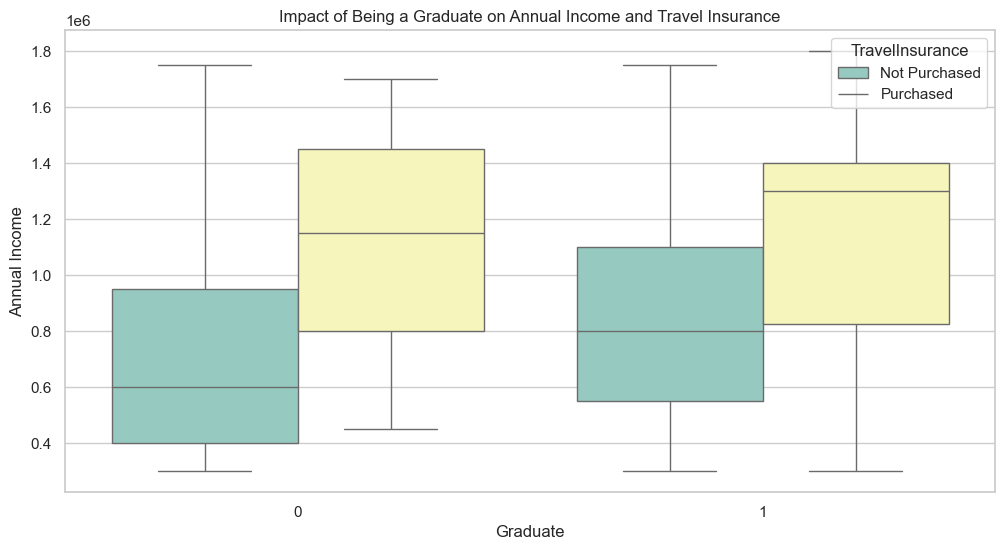

Statistics of Annual Income and Travel Insurance by Graduate Status:
TravelInsurance     0    1
GraduateOrNot             
0                 196   99
1                1081  611


In [23]:
# Correlation with income: Investigate if being a graduate has an impact on annual income and, consequently, travel insurance purchases.

def analyze_graduate_income_and_insurance(df, graduate_column, income_column, insurance_column):
    # Visualize the impact of being a graduate on annual income
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x=graduate_column, y=income_column, hue=insurance_column, palette="Set3")
    plt.title('Impact of Being a Graduate on Annual Income and Travel Insurance')
    plt.xlabel('Graduate')
    plt.ylabel('Annual Income')
    plt.legend(title=insurance_column, labels=['Not Purchased', 'Purchased'],loc='upper right')
    plt.show()

    # Analyze the statistics of annual income and travel insurance by graduate status
    graduate_stats = df.groupby([graduate_column, insurance_column]).size().unstack(fill_value=0)
    print("Statistics of Annual Income and Travel Insurance by Graduate Status:")
    print(graduate_stats)
    
analyze_graduate_income_and_insurance(df, 'GraduateOrNot', 'AnnualIncome', 'TravelInsurance')


Those who graduated have a higher annual income, and a higher proportion of graduates have purchased travel insurance compared to non-graduates.

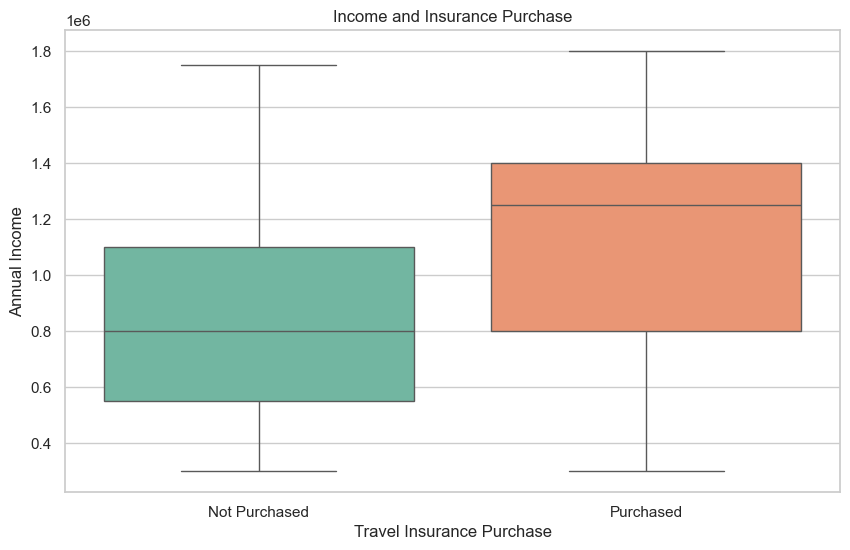

In [24]:
def visualize_income_and_insurance(df, income_column, insurance_column):
    # Create a box plot to visualize the distribution of income for insurance purchases
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x=insurance_column, y=income_column, hue=insurance_column, palette="Set2", legend=False)
    plt.title('Income and Insurance Purchase')
    plt.xlabel('Travel Insurance Purchase')
    plt.ylabel('Annual Income')
    plt.xticks([0, 1], ['Not Purchased', 'Purchased'])
    plt.show()

visualize_income_and_insurance(df, 'AnnualIncome', 'TravelInsurance')


Those who purchased travel insurance have a higher a higher annual income

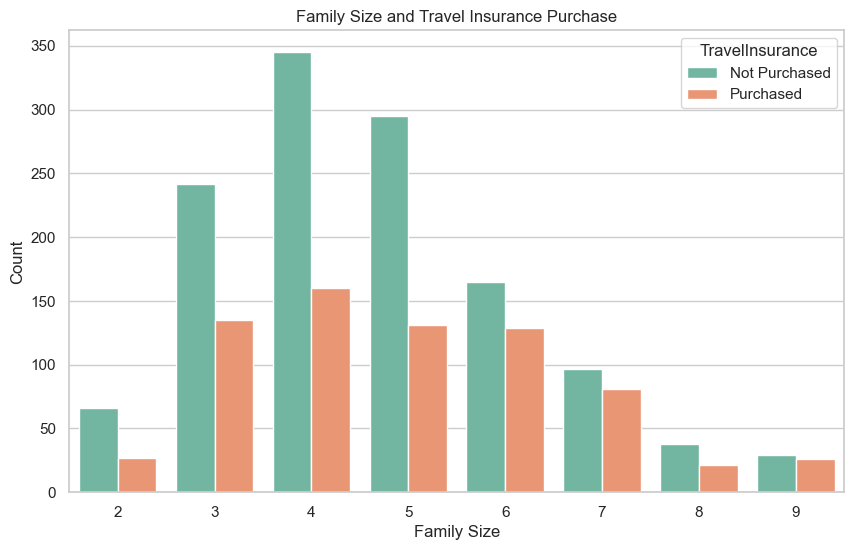

Statistics of Family Size and Travel Insurance Decisions:
TravelInsurance    0    1
FamilyMembers            
2                 66   27
3                242  135
4                345  160
5                295  131
6                165  129
7                 97   81
8                 38   21
9                 29   26


In [25]:
# Family size and insurance: Investigate if the number of family members influences travel insurance decisions.
def analyze_family_size_and_insurance(df, family_size_column, insurance_column):
    # Visualize the impact of family size on travel insurance decisions
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=family_size_column, hue=insurance_column, palette="Set2", legend=False)
    plt.title('Family Size and Travel Insurance Purchase')
    plt.xlabel('Family Size')
    plt.ylabel('Count')
    plt.legend(title=insurance_column, labels=['Not Purchased', 'Purchased'])
    plt.show()

    # Analyze the statistics of family size and travel insurance decisions
    family_size_stats = df.groupby([family_size_column, insurance_column]).size().unstack(fill_value=0)
    print("Statistics of Family Size and Travel Insurance Decisions:")
    print(family_size_stats)

analyze_family_size_and_insurance(df, 'FamilyMembers', 'TravelInsurance')


Regardless of family size, most families opt to not purchase travel insurance

Correlation for Chronic Disease vs Travel Insurance: 0.02
Correlation for Frequent Flyer vs Travel Insurance: 0.23
Correlation for Travel Abroad vs Travel Insurance: 0.43


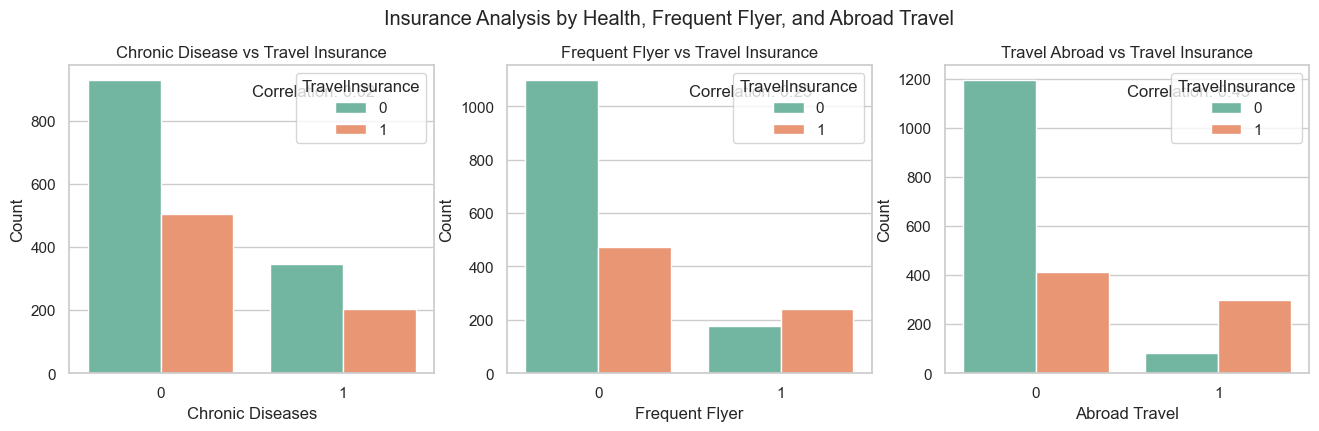

In [34]:
def analyze_health_frequent_flyers_travel_insurance(df, chronic_diseases_column, frequent_flyer_column, abroad_travel_column, insurance_column):
    # Create subplots as a 1x3 grid
    fig, axes = plt.subplots(1, 3, figsize=(16, 4))

    # Calculate the correlation between each variable and insurance
    correlation_cd = df[[chronic_diseases_column, insurance_column]].corr().iloc[0, 1]
    correlation_ff = df[[frequent_flyer_column, insurance_column]].corr().iloc[0, 1]
    correlation_at = df[[abroad_travel_column, insurance_column]].corr().iloc[0, 1]

    # Insurance and health
    sns.countplot(data=df, x=chronic_diseases_column, hue=insurance_column, palette="Set2", ax=axes[0])
    axes[0].set_title('Chronic Disease vs Travel Insurance')
    axes[0].set_xlabel('Chronic Diseases')
    axes[0].set_ylabel('Count')
    axes[0].annotate(f'Correlation: {correlation_cd:.2f}', xy=(0.5, 0.9), xycoords='axes fraction')
    print(f'Correlation for Chronic Disease vs Travel Insurance: {correlation_cd:.2f}')

    # Relationship with travel insurance
    sns.countplot(data=df, x=frequent_flyer_column, hue=insurance_column, palette="Set2", ax=axes[1])
    axes[1].set_title('Frequent Flyer vs Travel Insurance')
    axes[1].set_xlabel('Frequent Flyer')
    axes[1].set_ylabel('Count')
    axes[1].annotate(f'Correlation: {correlation_ff:.2f}', xy=(0.5, 0.9), xycoords='axes fraction')
    print(f'Correlation for Frequent Flyer vs Travel Insurance: {correlation_ff:.2f}')

    # Impact on insurance
    sns.countplot(data=df, x=abroad_travel_column, hue=insurance_column, palette="Set2", ax=axes[2])
    axes[2].set_title('Travel Abroad vs Travel Insurance')
    axes[2].set_xlabel('Abroad Travel')
    axes[2].set_ylabel('Count')
    axes[2].annotate(f'Correlation: {correlation_at:.2f}', xy=(0.5, 0.9), xycoords='axes fraction')
    print(f'Correlation for Travel Abroad vs Travel Insurance: {correlation_at:.2f}')
    
    # Set an overall title for the subplots
    fig.suptitle('Insurance Analysis by Health, Frequent Flyer, and Abroad Travel', y=1.02)

    # Display the plots
    plt.show()


analyze_health_frequent_flyers_travel_insurance(df, 'ChronicDiseases', 'FrequentFlyer', 'EverTravelledAbroad', 'TravelInsurance')


***Chronic Disease vs Travel Insurance:***


**No Chronic Disease** - more people do not purchase travel insurance

**Chronic Disease** - more people do not purchase travel insurance

**Correlation** - very low indicating weak correlation between Chronic Disease and Travel Insurance

<br>

***Frequent vs Travel Insurance:***


**Not Frequent Flyer** - more people do not purchase travel insurance

**Frequent Flyer** - more people do purchase travel insurance

**Correlation** - low, indicating their is a low correlation between the two

<br>

***Travel Abroad vs Travel Insurance:***


**Not Travelled Abroad** - more people do not purchase travel insurance

**Travelled Abroad** - more people do purchase travel insurance

**Correlation** - nearly .5, indicating their is a positive moderate correlation between the two

##### Other Visuals

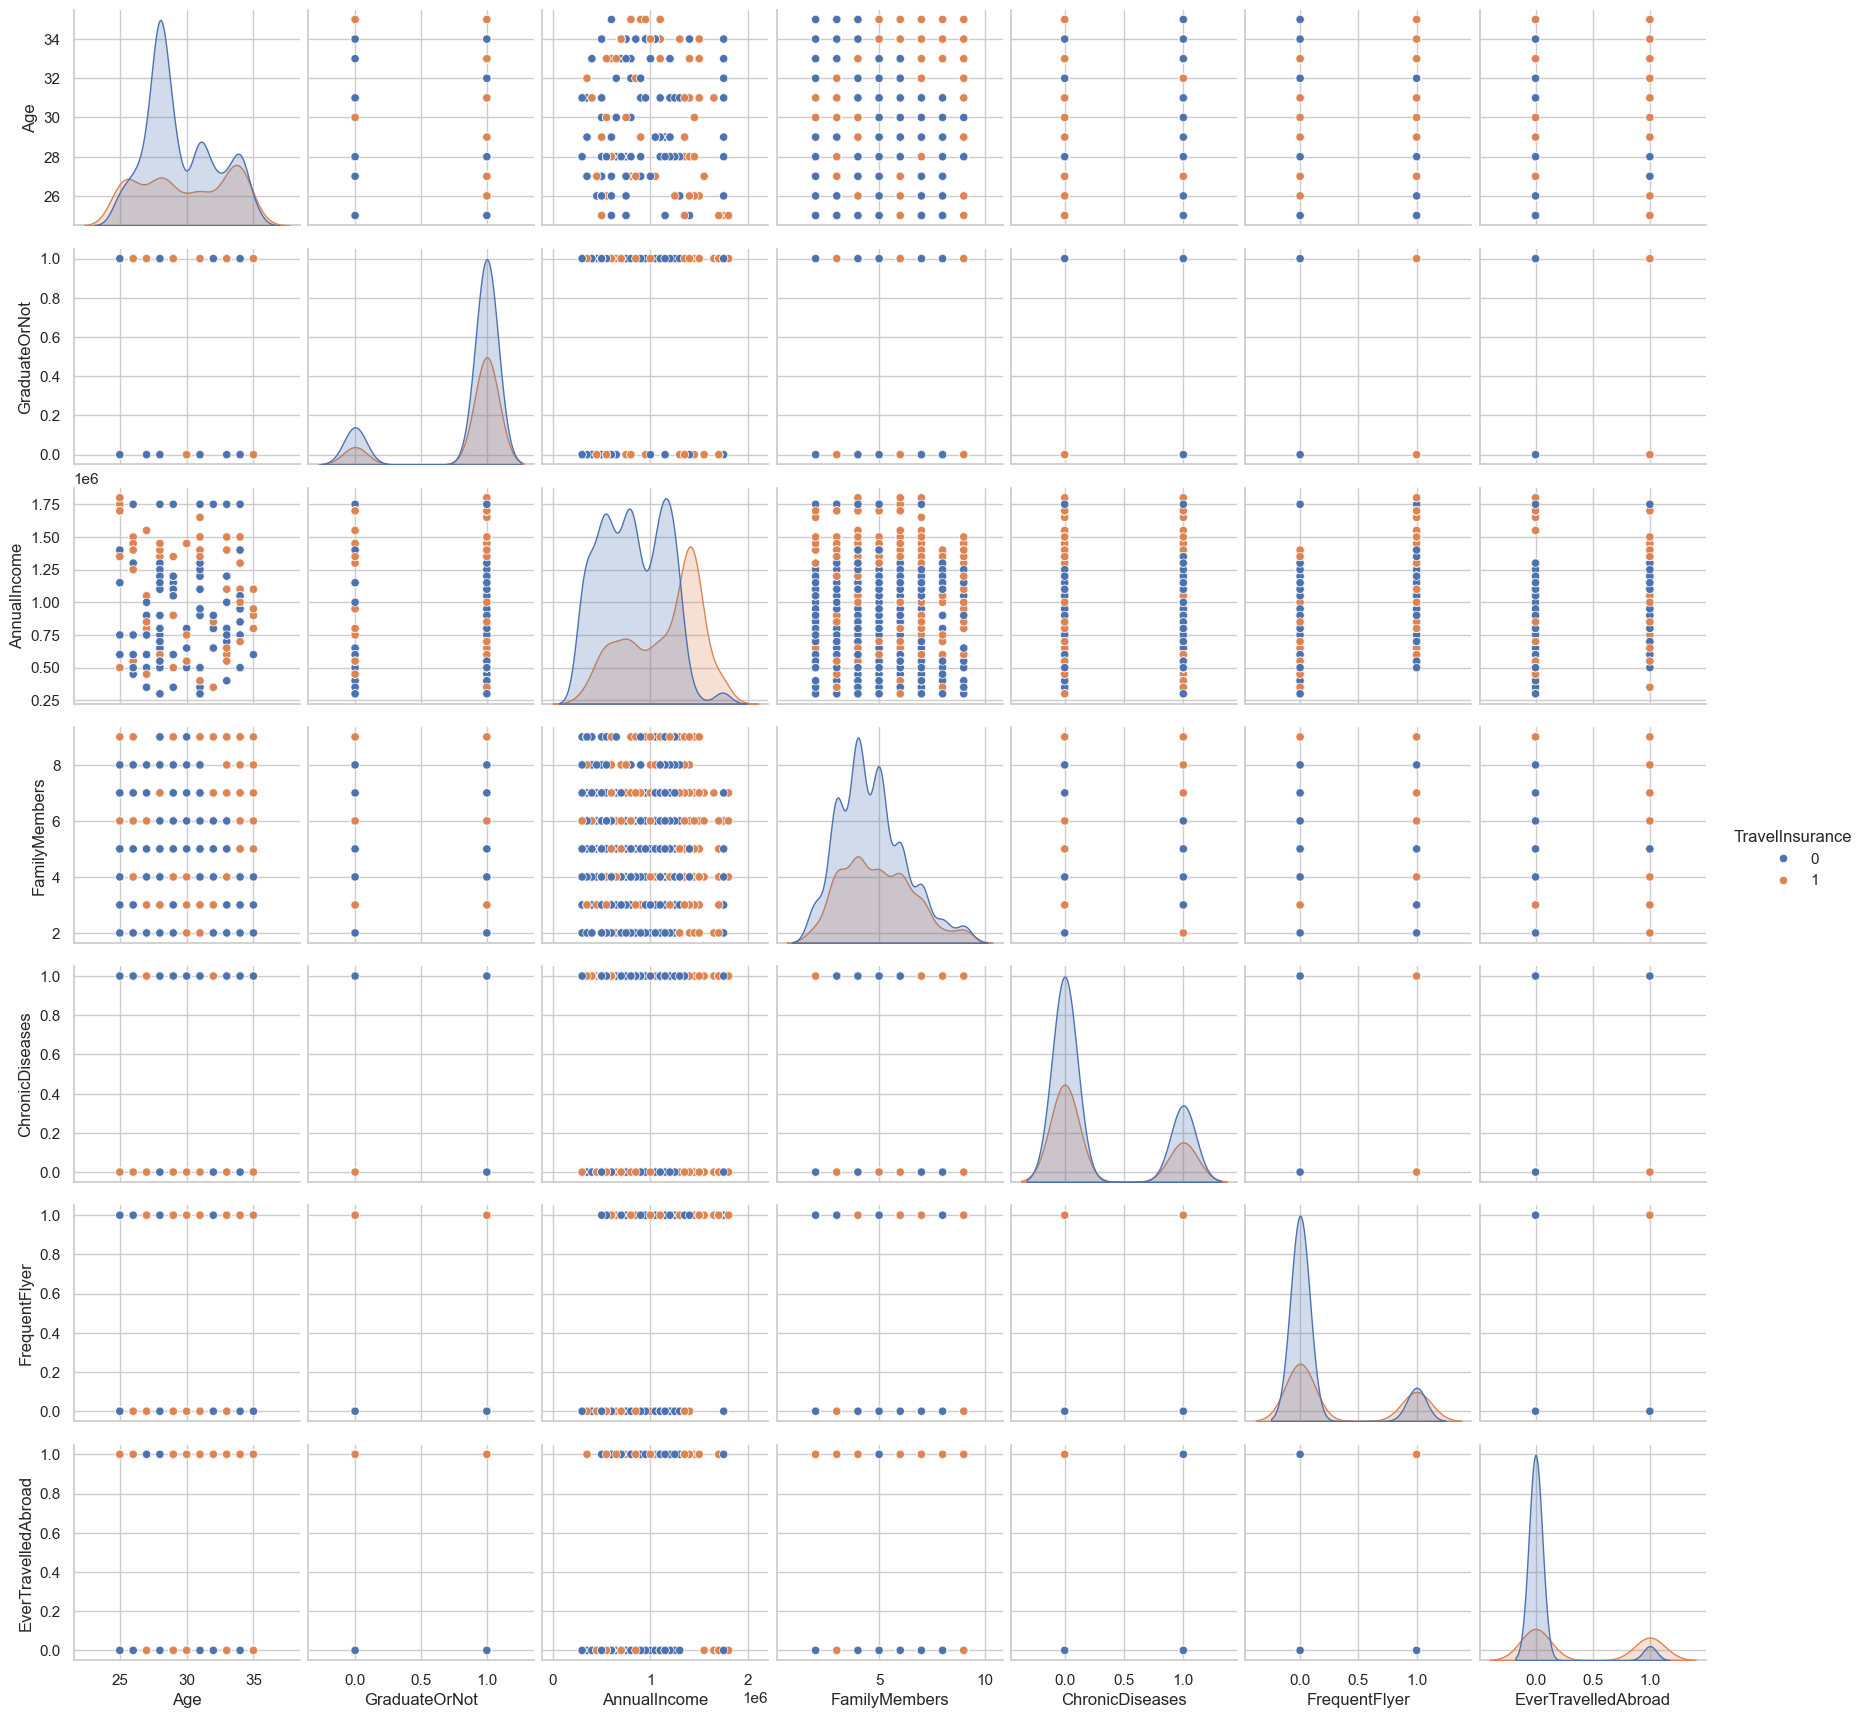

In [27]:
# Pair plot
sns.pairplot(df, hue  = 'TravelInsurance')

observations

<AxesSubplot: >

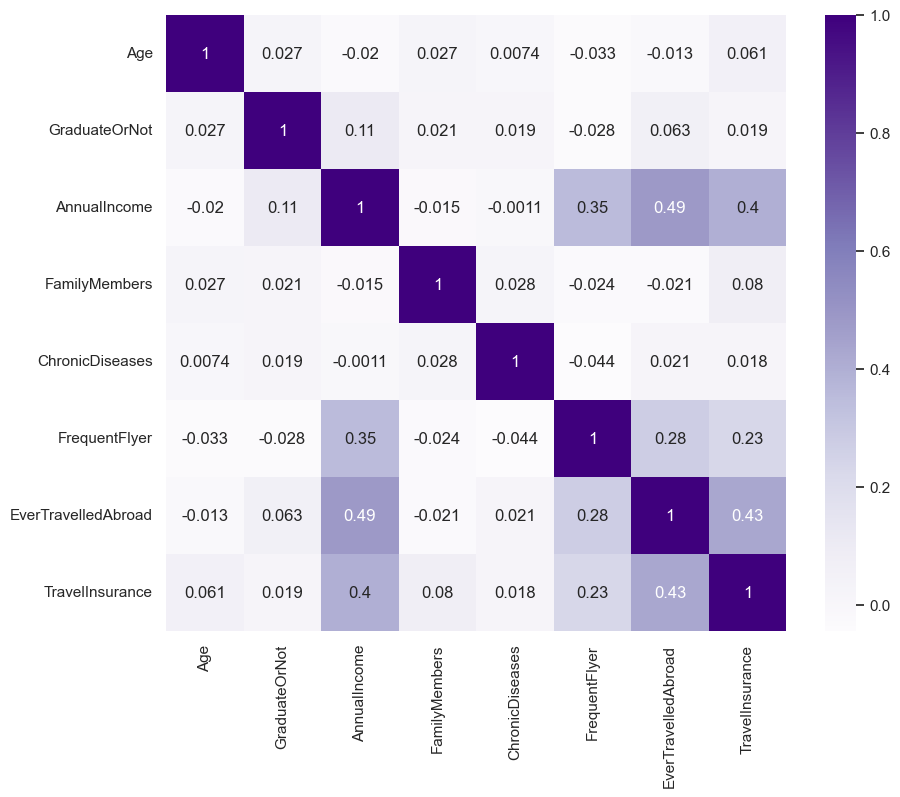

In [28]:
# Correlation

corr = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='Purples')
